










# Project Name - EDA 

# Contribution - Individual



# <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
# **Project Summary -**
## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# GitHub Link -

# Data Collection and Understanding:


# Importing Essential Libraries

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

## Mounting drive

In [ ]:
# Now lets mount our drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## csv file location

In [ ]:
# importing the data from the drive and reading the cs file.
file_path='/content/drive/MyDrive/Capstone Project -1/Hotel Bookings (1).csv'
hb=pd.read_csv(file_path)

# Data Exploration

In [ ]:
#checking the shape ( rows and column numbers)
print(f' We have total {hb.shape[0]} rows and {hb.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [ ]:
# Checking first 10 rows
hb.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
# looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.

hb.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
# looking for the data types non null entries
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data Description:

1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was cancelled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Cancelled – booking was cancelled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking cancelled or when did the customer checked-out of the hotel*

In [ ]:
# creating a copy of our dataset
hb1=hb.copy()

In [ ]:
# columns name list
print(list(hb1.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# converting object type to datetime
hb1['reservation_status_date'] = pd.to_datetime(hb1['reservation_status_date'], format = '%Y-%m-%d')

### **Data Cleaning and Manipulation**

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \ 1) Remove duplicate rows \ 2) Handling missing values. \ 3) Convert columns to appropriate datatypes. \ 4) Adding important columns

**Step 1: Removing duplicate rows if any**

In [ ]:
hb1[hb1.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(31994, 32)

In [ ]:
# Dropping duplicate values
hb1.drop_duplicates(inplace = True)

In [ ]:
hb1.shape

(87396, 32)

**Step 2: Handling missing values**.

In [ ]:
# Columns having missing values.
hb1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \ We will replace null values by 0 in these columns

In [ ]:
hb1[['company','agent']] = hb1[['company','agent']].fillna(0)

In [ ]:
hb1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \ So, 'nan' values are the missing values due to error of recording data. \ \ We will replace the null values under this column with mean value of children.

In [ ]:
hb1['children'].fillna(hb1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer. \ Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [ ]:
hb1['country'].fillna('others', inplace = True)

In [ ]:
# Checking if all null values are removed
hb1.isnull().sum().sort_values(ascending = False)[:6]


hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
hb1[hb1['adults']+hb1['babies']+hb1['children'] == 0].shape

(166, 32)

In [ ]:
hb1.drop(hb1[hb1['adults']+hb1['babies']+hb1['children'] == 0].index, inplace = True)

**Step 3: Converting columns to appropriate datatypes**.



In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hb1[['children', 'company', 'agent']] = hb1[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
hb1['reservation_status_date'] = pd.to_datetime(hb1['reservation_status_date'], format = '%Y-%m-%d')

**Step 4: Adding important columns.**

In [ ]:
# Adding total staying days in hotels
hb1['total_stay'] = hb1['stays_in_weekend_nights']+hb1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
hb1['total_people'] = hb1['adults']+hb1['children']+hb1['babies']

We are adding this column so that we can analyse the stay length at hotels.

## Exploratory Data Analysis(EDA)

# Univariate Analysis

#1) Which type of hotel is mostly prefered by the guests?

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

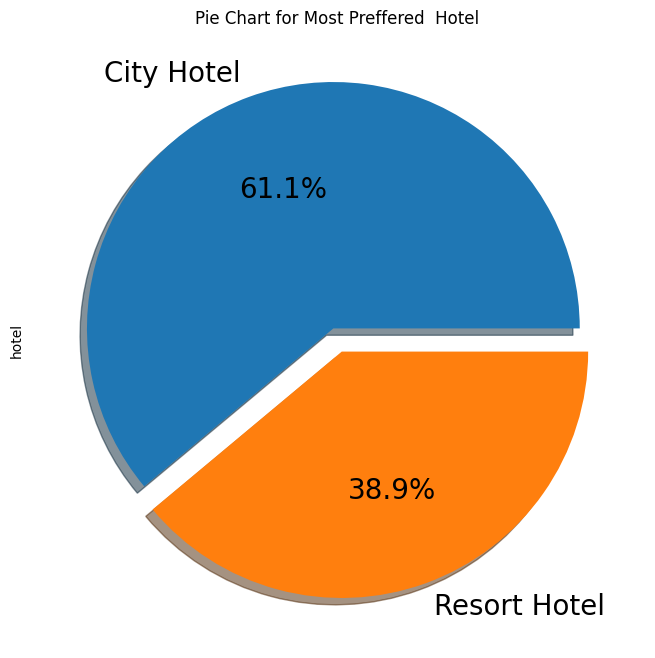

In [ ]:
# Visualizsing the by pie chart.
hb1['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

### **Observation**
### City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

#2) Which Agent made the most bookings?

In [ ]:
# return highest bookings made by agents
highest_bookings= hb1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9,28721
174,240,13028
14,14,3342
7,7,3294
183,250,2779
175,241,1644
27,28,1493
8,8,1383
1,1,1228
6,6,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

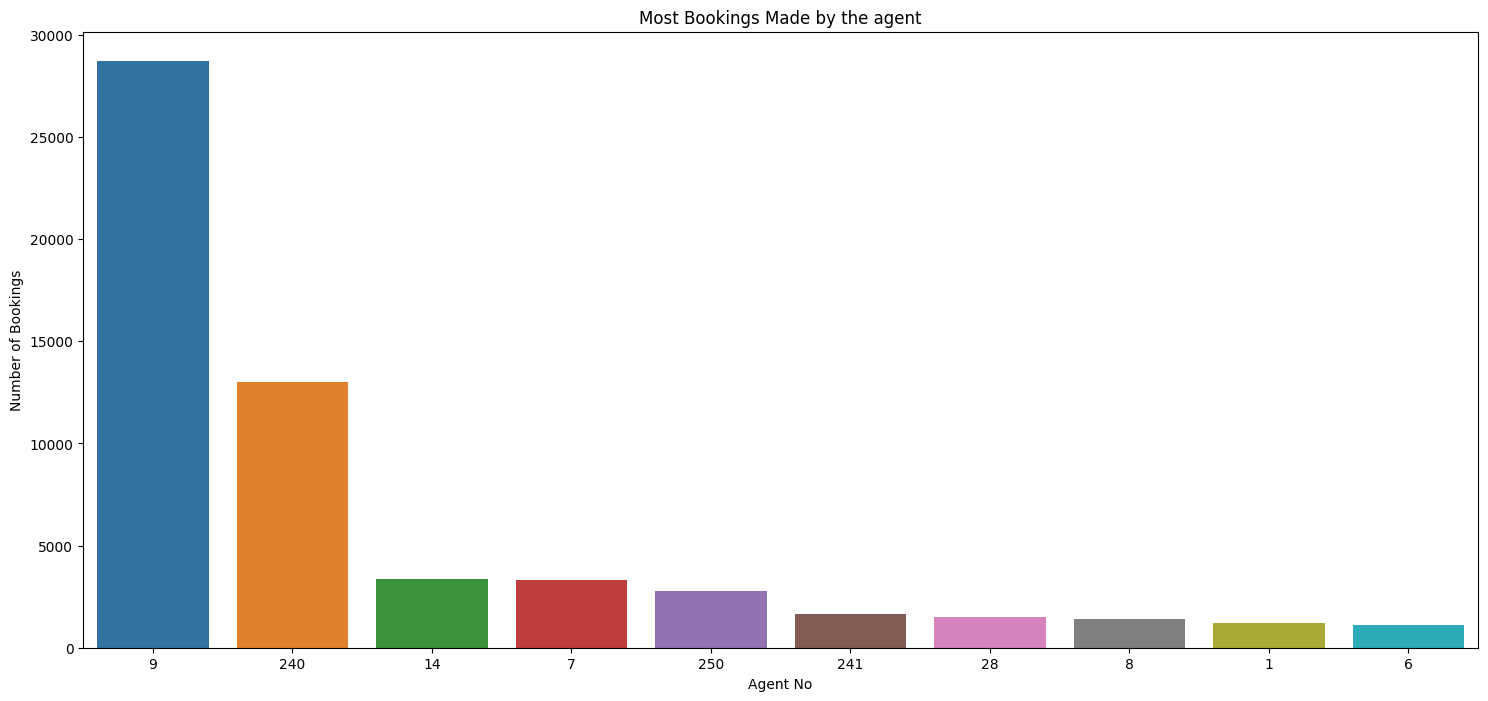

In [ ]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

### **Observation**
### Agent ID no: 9 made most of the bookings

#3)What is the percentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

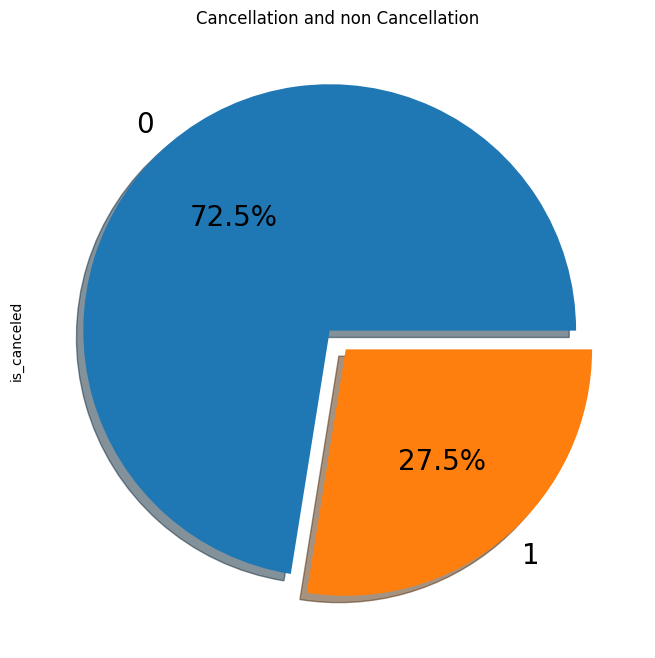

In [ ]:
hb1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

### **Observation :**
### 0= not cancled
### 1= canceled

### 27.5 % of the bookings were cancelled.

# 4) What is the Percentage of repeated guests?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

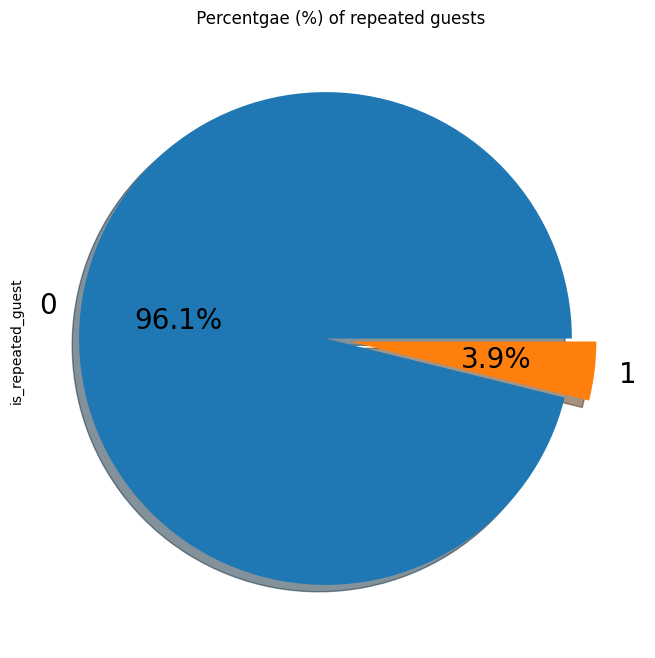

In [ ]:
hb1['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

### **Observation:**
### Repeated guests are very few which only 3.9 %.
###In order to retained the guests management should take feedbacks from guests and try to imporve the services.

#5) What is the percentage distribution of "Customer Type"?

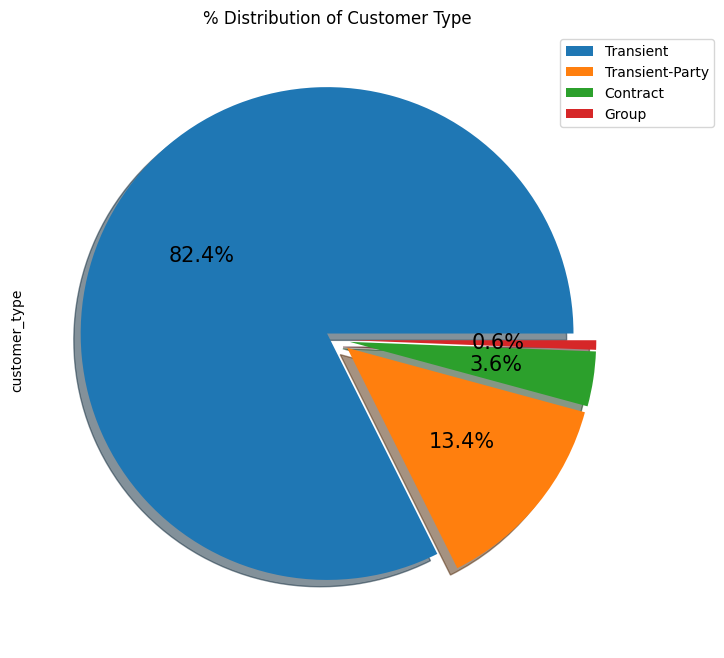

In [ ]:
hb1['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=hb1['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


**1. Contract** 
>when the booking has an allotment or other type of contract associated to it

**2. Group**
> when the booking is associated to a group

**3. Transient**
>when the booking is not part of a group or contract, and is not associated to other transient booking

**4. Transient-party**
>when the booking is transient, but is associated to at least other transient booking

### **Observation:**
### Transient customer type is more which is 82.4 %. percentage of  Booking associated by the Group is vey low.

#6)What is the percentage distribution of required_car_parking_spaces?

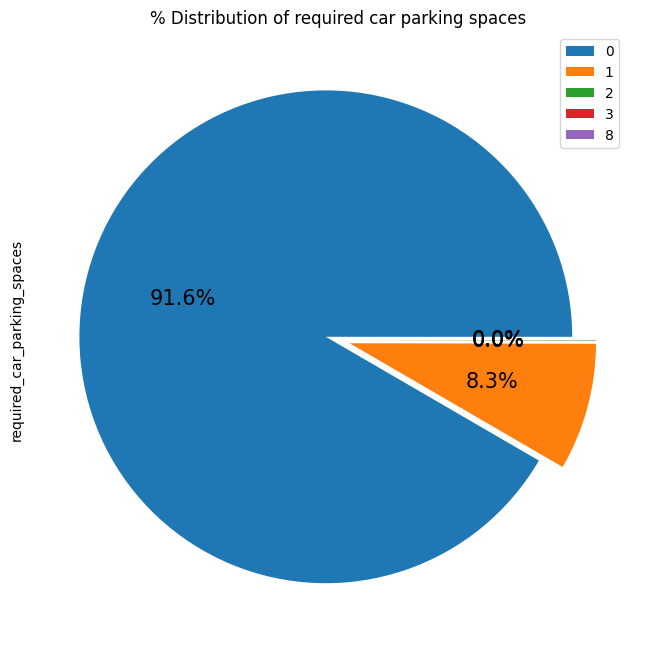

In [ ]:
hb1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=hb1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

### **Observation**
### 91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

# 7)What is the percentage of booking changes made by the customer?

Text(0, 0.5, 'Percentage(%)')

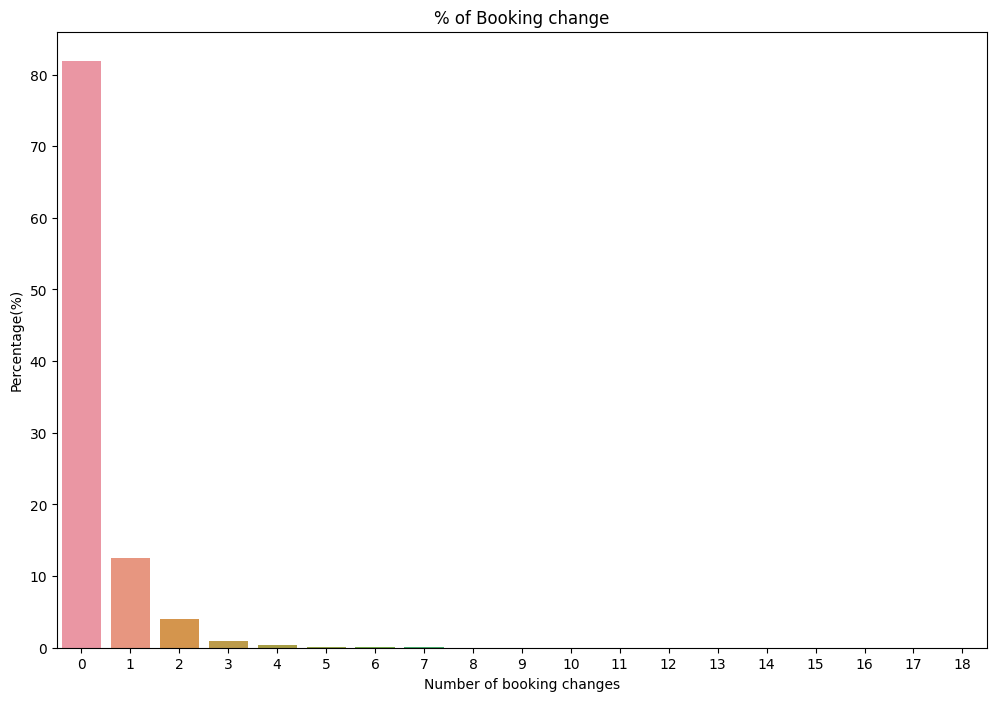

In [ ]:
booking_changes_hb=hb1['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_hb['number_booking_changes'],y=booking_changes_hb['Counts']*100/hb1.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

### 0= 0 changes made in the booking
### 1= 1 changes made in the booking
### 2= 2 changes made in the booking

### **Observation**
### Almost 82% of the bookings were not changed by guests.


# 8)What is Percentage distribution of Deposit type ?

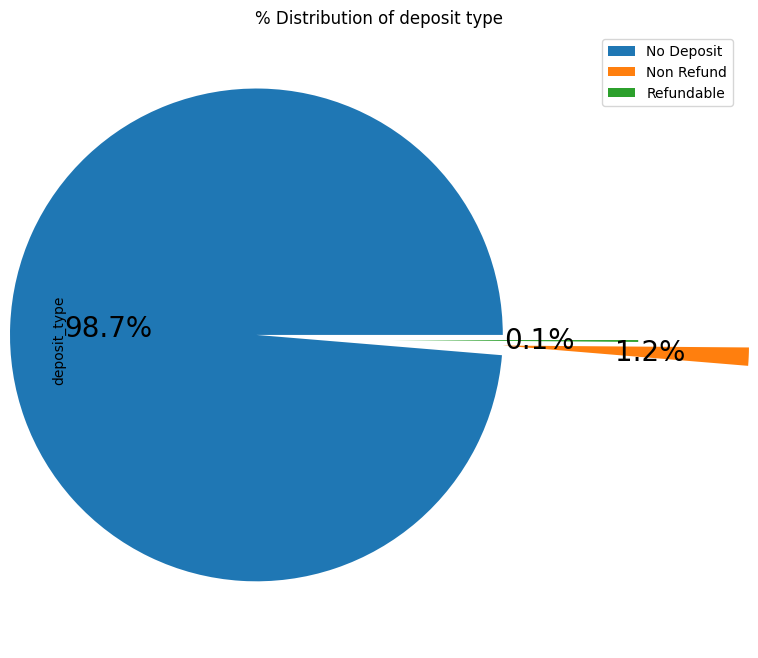

In [ ]:
hb1['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=hb1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

### **Observation**
### 98.7 % of the guests prefer "No deposit" type of deposit.

# 9) Which type of food is mostly preferred by the guests?



Text(0.5, 1.0, 'Preferred Meal Type')

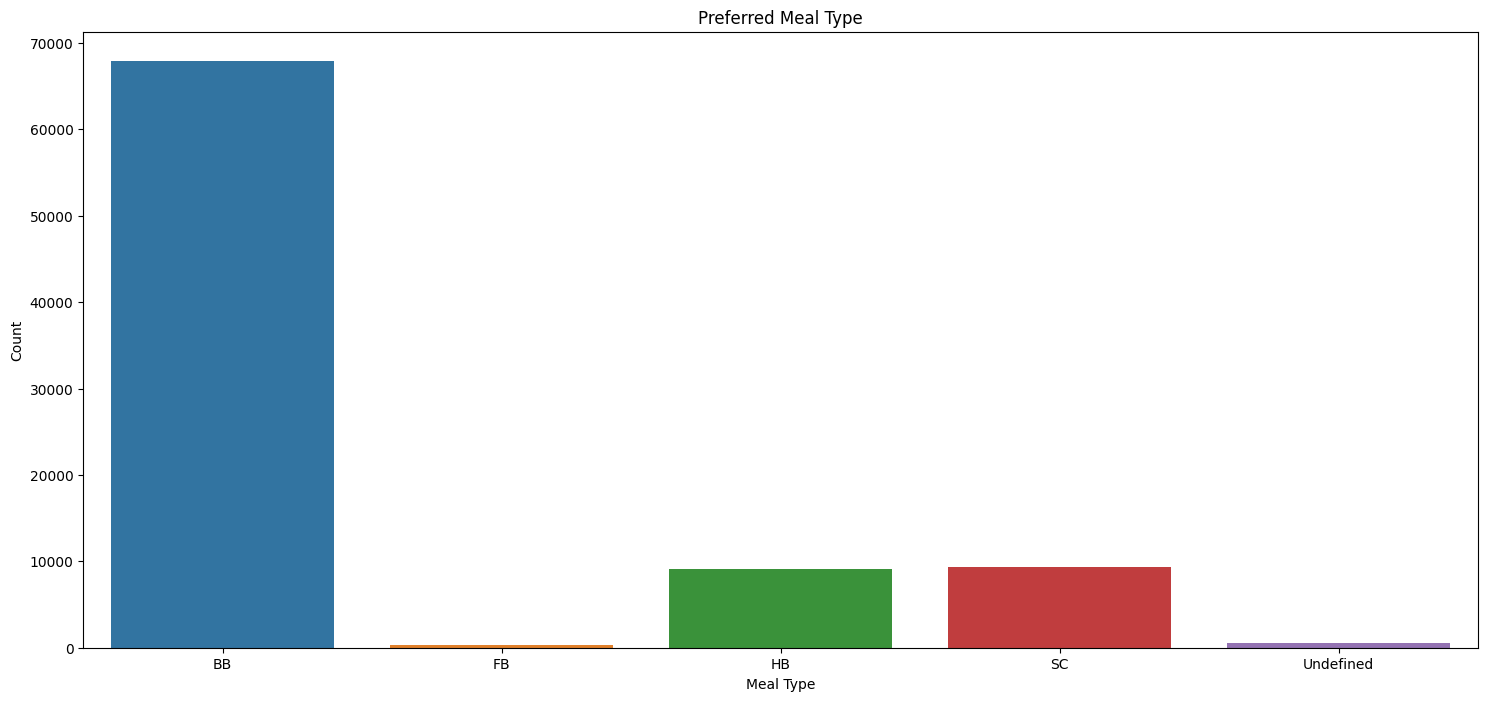

In [ ]:
# hb1['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(20,15),fontsize=20)
plt.figure(figsize=(18,8))
sns.countplot(x=hb1['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

Types of meal in hotels:
* BB - (Bed and Breakfast)
* HB- (Half Board)
* FB- (Full Board)
* SC- (Self Catering)
### **Observation**
### * So the most preferred meal type by the guests is BB( Bed and Breakfast) 
### * HB- (Half Board) and SC- (Self Catering) are equally preferred.


#10) Which is the most preferred room type by the customers?

Text(0.5, 1.0, 'Most preferred Room type')

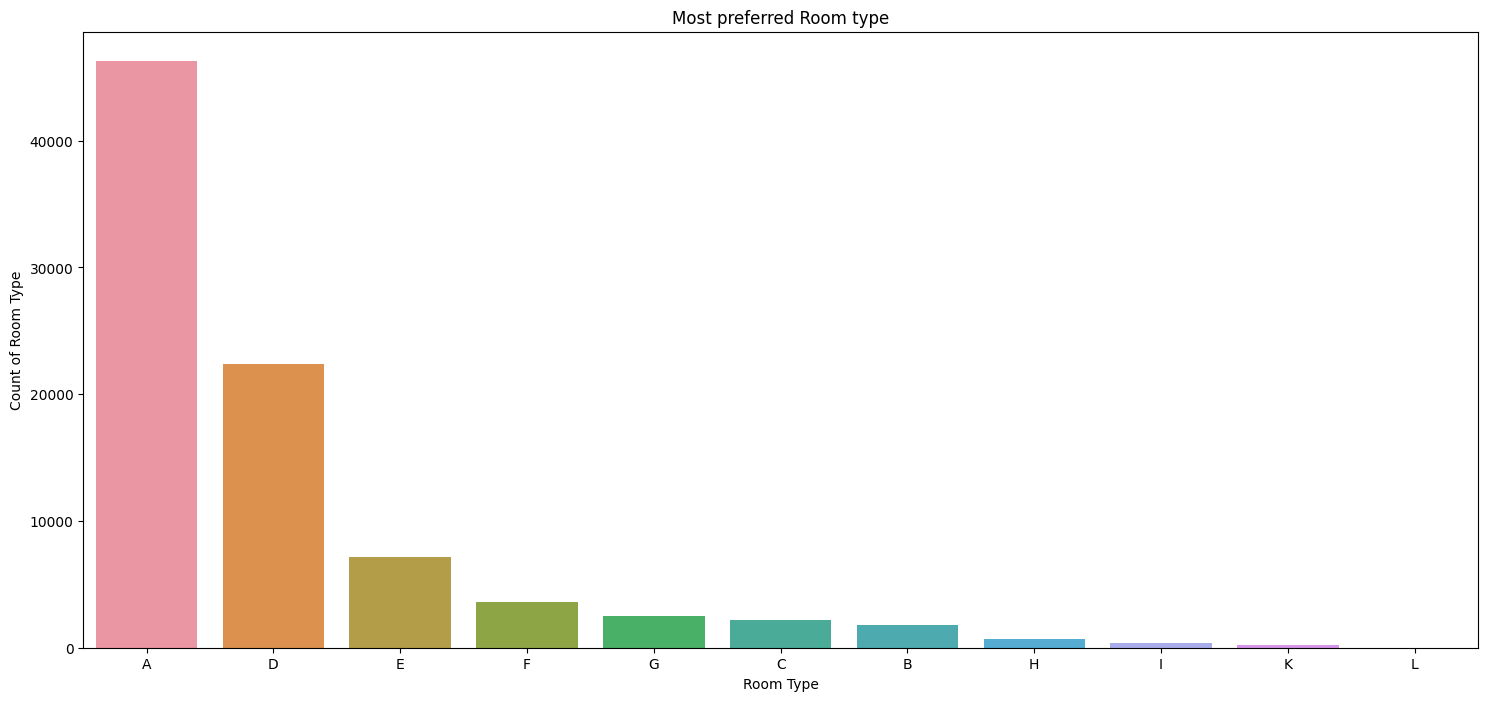

In [ ]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=hb1['assigned_room_type'],order=hb1['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

### **Observation**
###So the most preferred Room type is "A".

# 11)In which month most of the bookings happened?

In [ ]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_hb=hb1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_hb['arrival_date_month']=pd.Categorical(bookings_by_months_hb['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_hb.sort_values('arrival_date_month')

bookings_by_months_hb

,arrival_date_month,Counts
0,April,7900
1,August,11242
2,December,5112
3,February,6083
4,January,4685
5,July,10043
6,June,7756
7,March,7489
8,May,8344
9,November,4973


Text(0, 0.5, 'Number of bookings')

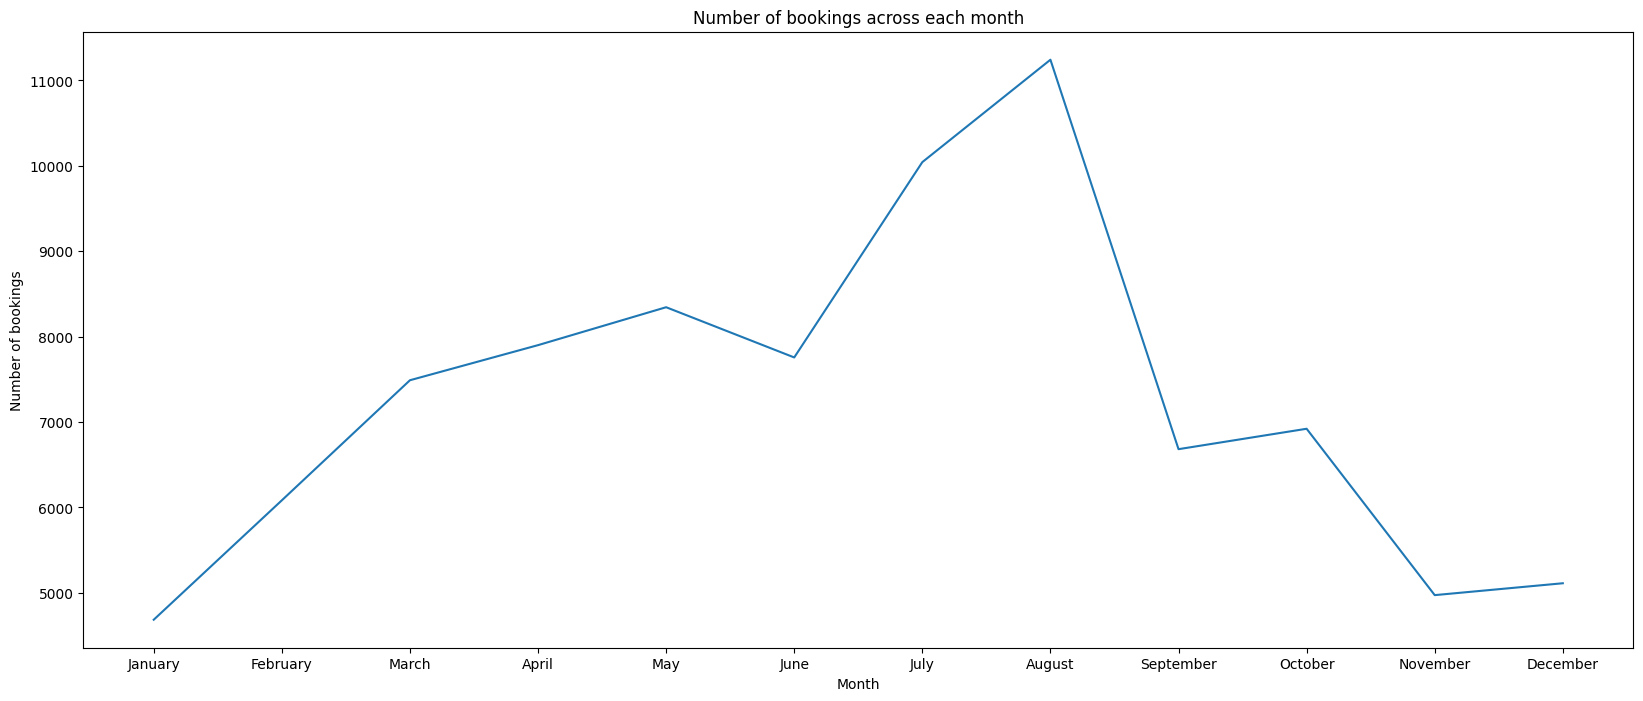

In [ ]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_hb['arrival_date_month'],y=bookings_by_months_hb['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

 ### **Observation**
 July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

#12) Which Distribution channel is mostly used for hotel bookings?

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

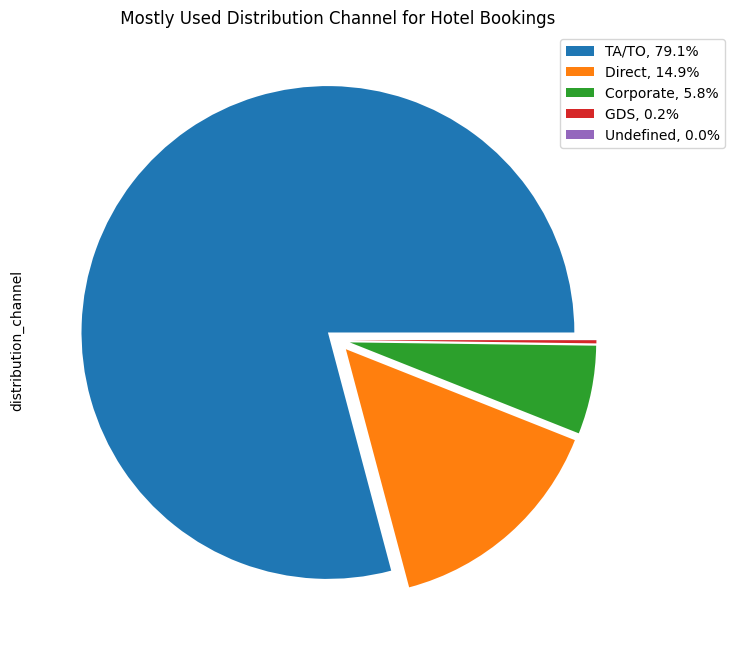

In [ ]:
# Visualizsing the by pie chart.


#Creating labels
labels=hb1['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=hb1['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/hb1.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the piw chart
hb1['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)   

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

###**Observation**:
###'TA/TO' is mostly(79.1%) used for booking hotels.

# Bivariate and Multivariate Analysis

In [ ]:
# group by hotel
grup_by_hotel=hb1.groupby('hotel')

#1) Which Hotel type has  the highest ADR?

<Axes: title={'center': 'Avg ADR of each Hotel type'}, xlabel='hotel', ylabel='adr'>

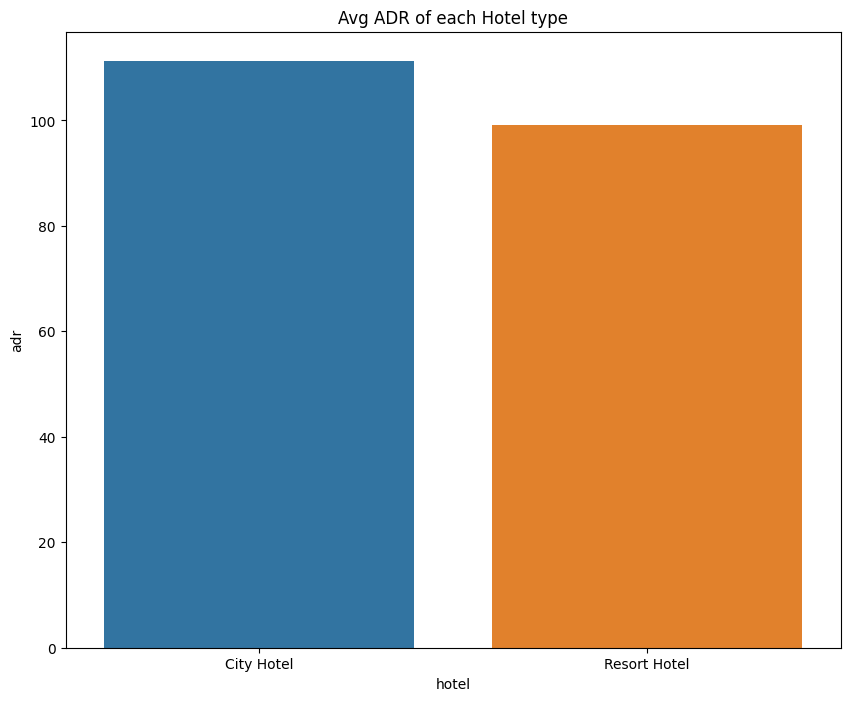

In [ ]:
#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

### **Observation**
### City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

# 2) Which hotel type has the more lead time?

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

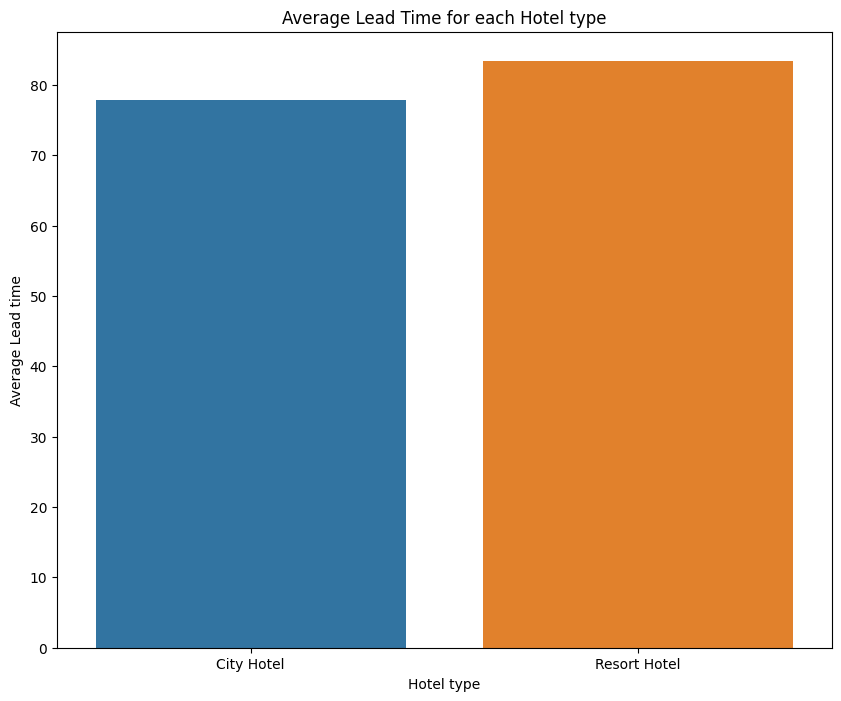

In [ ]:
#group by hotel and taking mean of lead time
avg_lead_time=grup_by_hotel['lead_time'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

###**Observation**
###Resort hotels has slightly  high avg lead time. That means customers plan their trips very early. 

#3) Which hotel has highest the percentage of booking cancellation?


Text(0.5, 1.0, 'Percentage of booking cancellation')

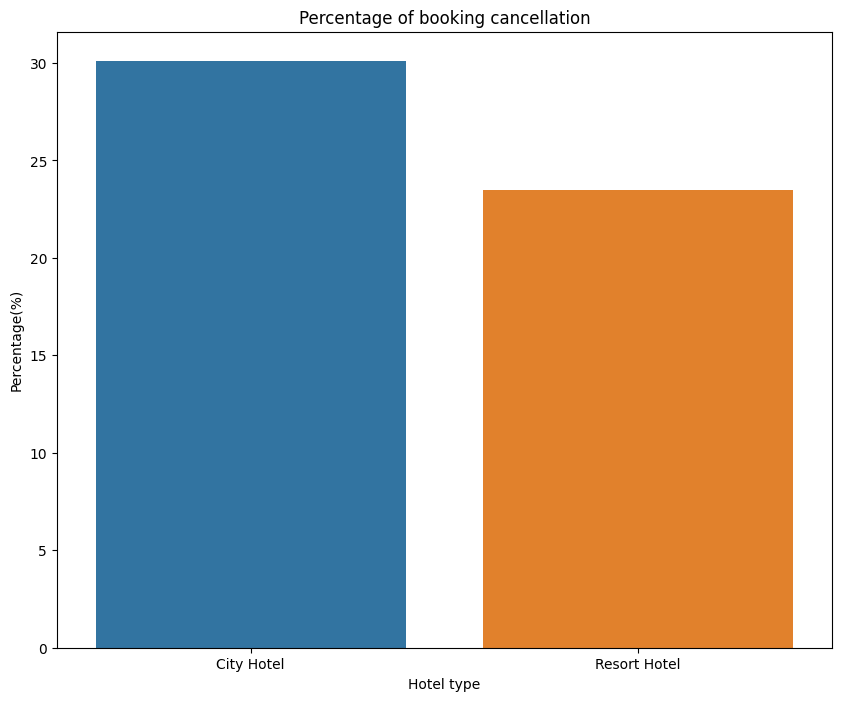

In [ ]:
# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_hb=hb1[hb1['is_canceled']==1]

# Grouping by hotel
canceled_hb=canceled_hb.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_hb['total_booikngs']=hb1.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_hb

#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=canceled_hb['hotel'],y=canceled_hb['no_of_cancelled_bookings']*100/canceled_hb['total_booikngs'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

#4) Which hotel has a longer waiting time?

Text(0.5, 1.0, 'Waiting time for each hotel type')

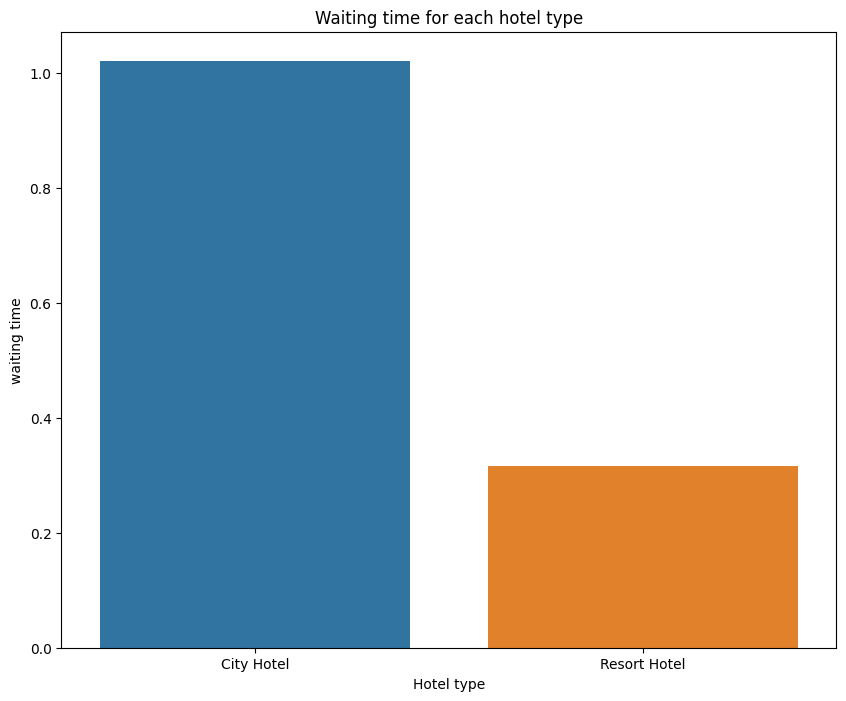

In [ ]:
#groupping by hoetl and takin mean of days in waiting list
waiting_time_hb=hb1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_hb['hotel'],y=waiting_time_hb['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

###**Observation**
### So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

# 5) Which Hotels have the most repeat guests?

Text(0.5, 1.0, 'Most repeated guests for each hotel')

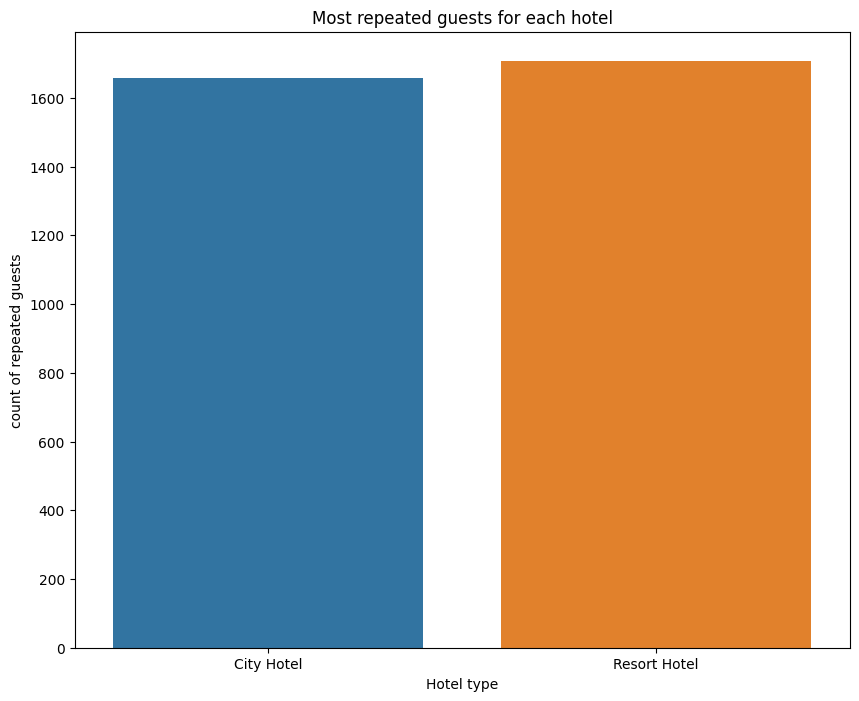

In [ ]:
# repeated guest=1
#not repeated guest=0
#groupby hotel
repeated_guests_hb=hb1[hb1['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_hb['hotel'],y=repeated_guests_hb['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

#**Observation**
###Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.

# 6) ADR across the different months.

In [ ]:
#groupby
bookings_by_months_hb=hb1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_hb['arrival_date_month']=pd.Categorical(bookings_by_months_hb['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_hb=bookings_by_months_hb.sort_values('arrival_date_month')
bookings_by_months_hb

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


Text(0, 0.5, 'ADR')

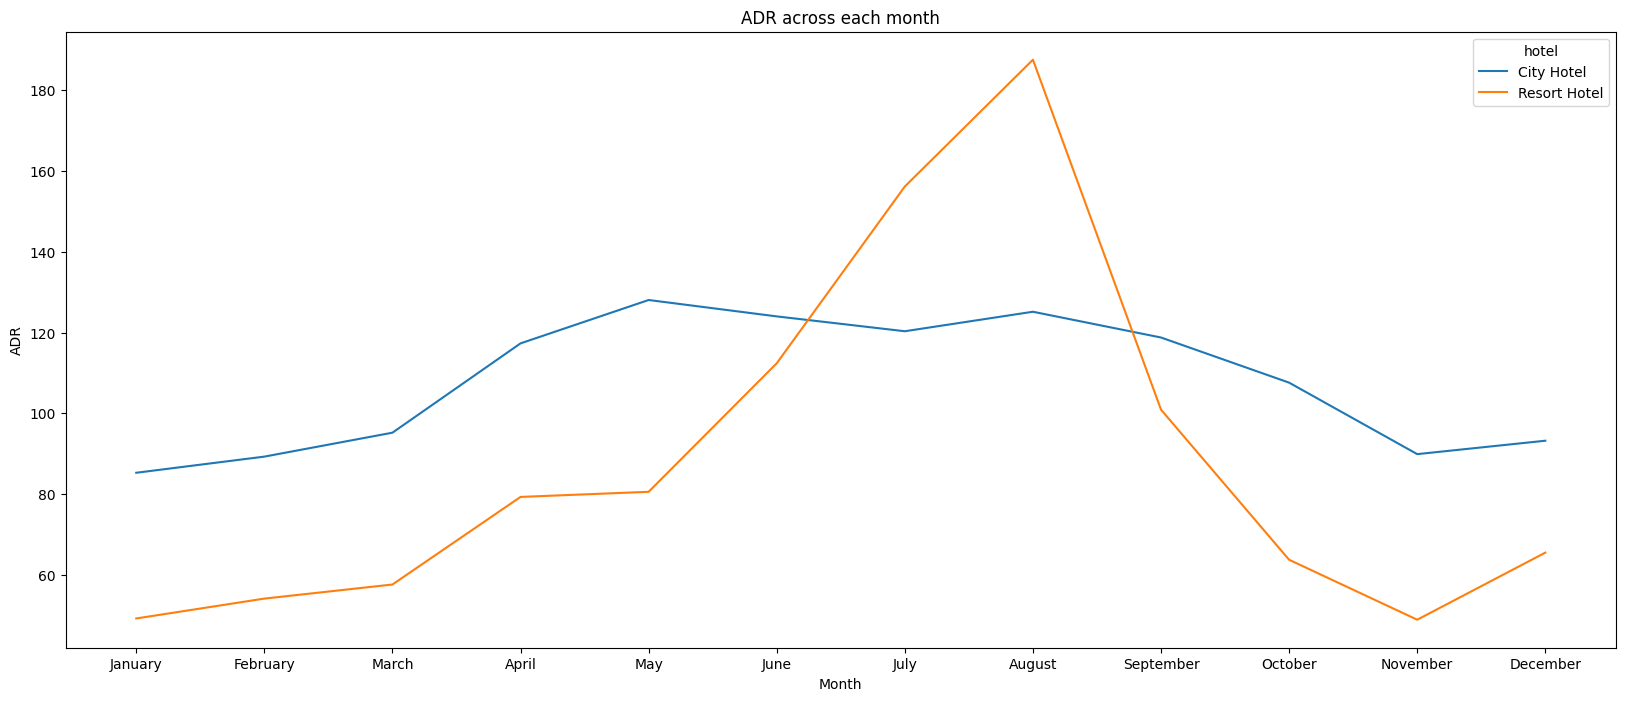

In [ ]:
# set plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_hb['arrival_date_month'],y=bookings_by_months_hb['adr'],hue=bookings_by_months_hb['hotel'])

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

### **Observation**

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

#7) Which distribution channel has the highest cancellation rate?


Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

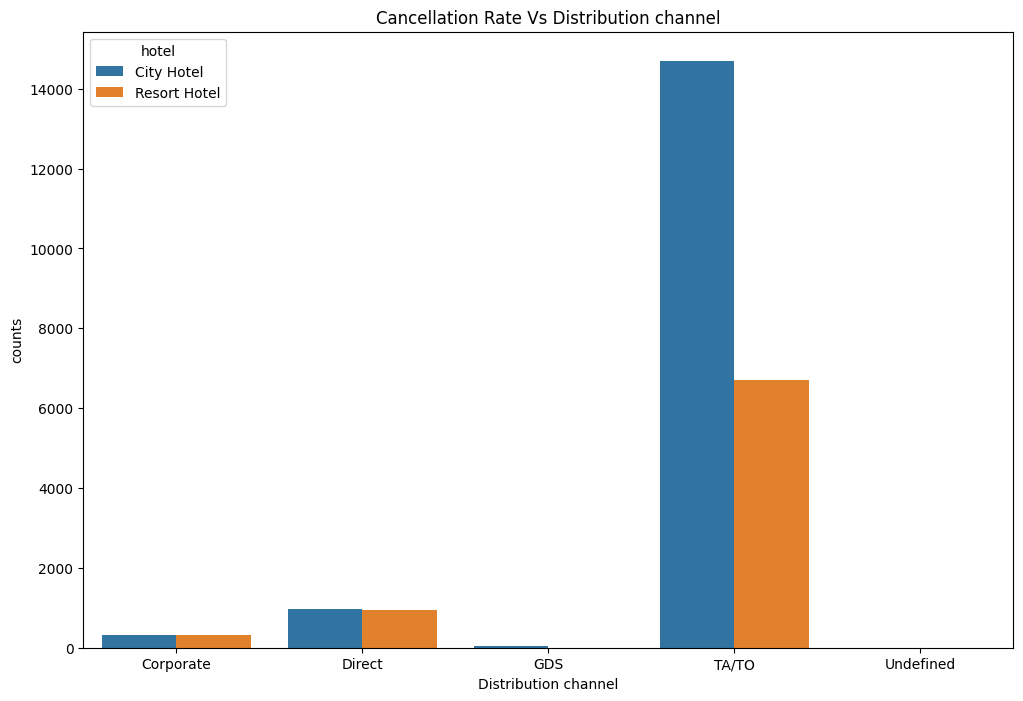

In [ ]:
canceled_hb=hb1[hb1['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_hb=canceled_hb.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_hb['Percentage']=canceled_hb['Counts']*100/hb1[hb1['is_canceled']==1][0]
canceled_hb

#set plot size and plot barchart 
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_hb)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

### **Observation**

* In "TA/TO", City hotels has the high cancellation rate compared to resort 
hotels.
* In "direct" both the hotels has almost same cancellation rate.

#8)Which Market Segment  has the higest cancellation rate?

In [ ]:
market_segment_hb=hb1[hb1['is_canceled']==1]   # canceled=1
market_segment_hb
market_segment_hb=market_segment_hb.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_hb

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1257


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

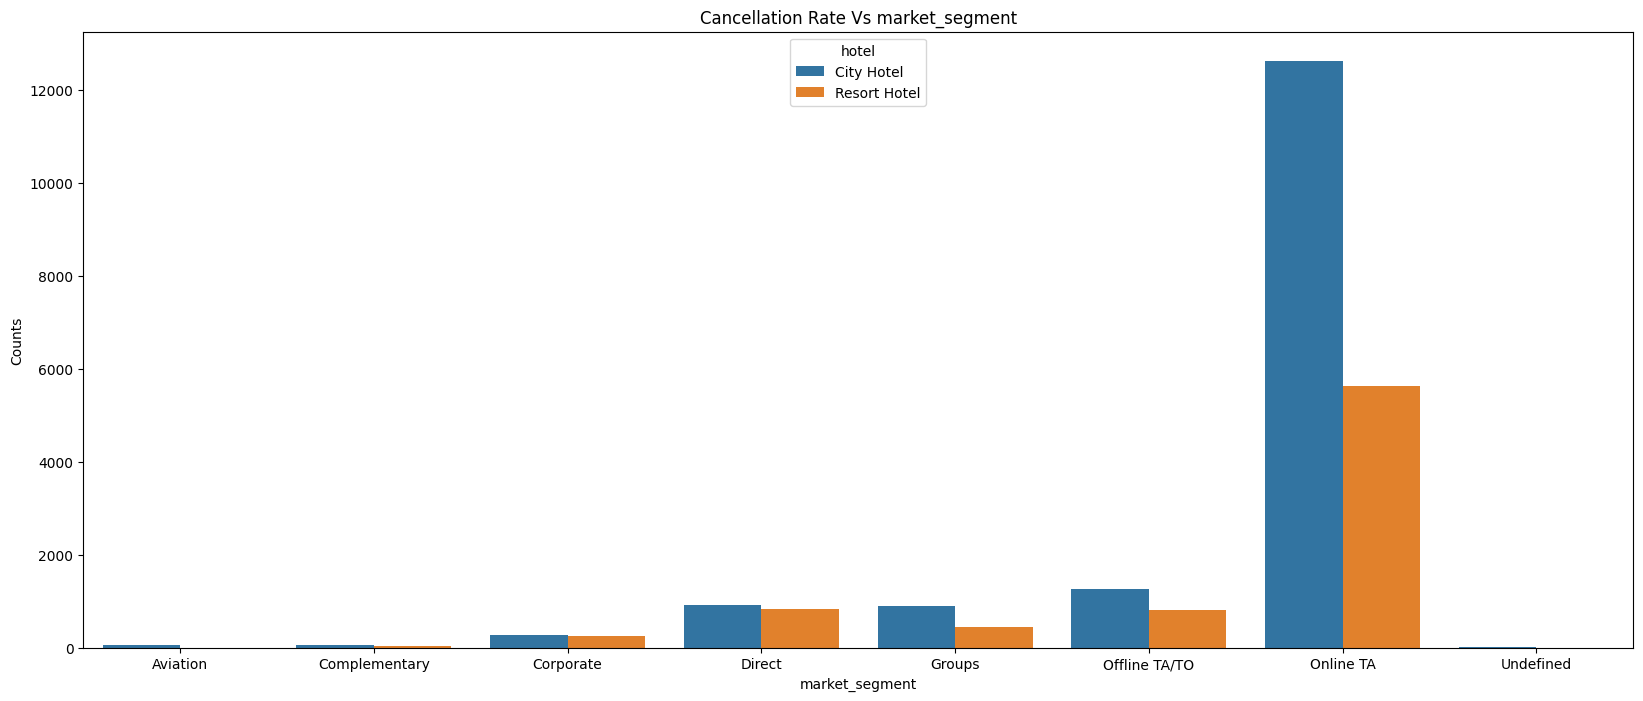

In [ ]:
#set plotsizde and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_hb)

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

### **Observation** 
### 'Online T/A' has the highest cancellation in both type of cities'
In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

#9) Do the guests alloted the same room type which was reserved by them?


In [ ]:
# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):
  '''function to check whether the reserved room 
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0  


([<matplotlib.axis.XTick at 0x7f328ba30af0>,
 [Text(0, 0, 'Not canceled'), Text(1, 0, 'canceled')])

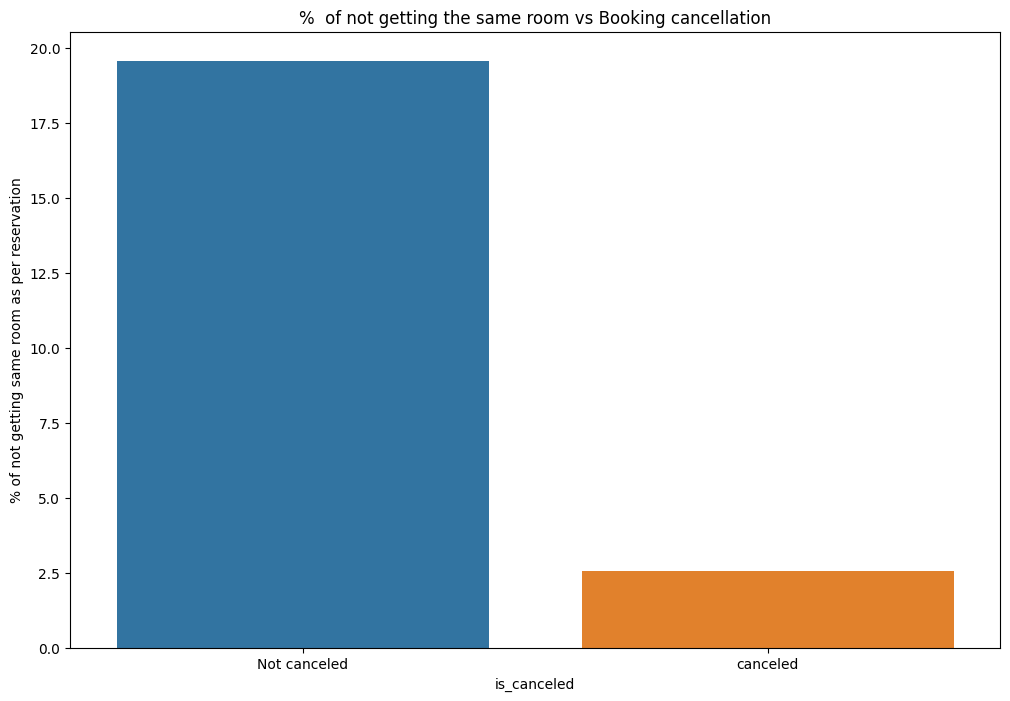

In [ ]:
# create new column to hb1
hb1['Same_room_alloted_or_not']=hb1.apply(lambda x: same_room_allotment(x),axis=1)

#groupby is canceled
grp_by_canceled_df=hb1.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])

# set labels
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])

### **Obseravtion**


### Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.


#10) What is the Optimal stay length in both types of hotels ?

In [ ]:
stay = hb1.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns


Text(0.5, 0, 'total_stay(days)')

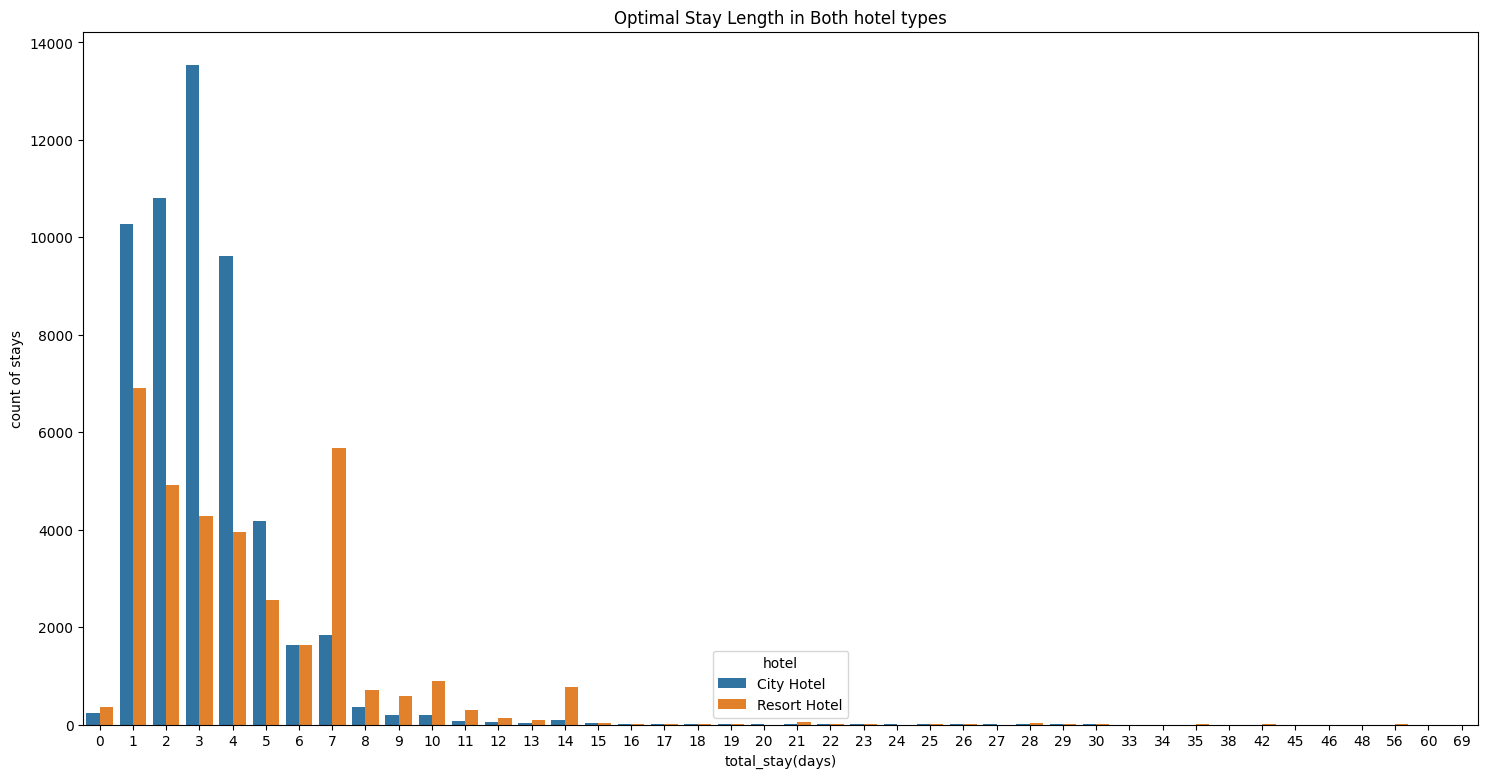

In [ ]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

### **Observation:**
Optimal stay in both the type hotel is less than 7 days.

# Relationship between ADR and total stay.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Groupby adr,total,stay,hotel,
adr_vs_stay = hb1.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay

,total_stay,adr,hotel
0,0,0.00,City Hotel
1,0,0.00,Resort Hotel
2,1,0.00,City Hotel
3,1,0.00,Resort Hotel
4,1,1.00,City Hotel
...,...,...,...
17995,7,212.06,City Hotel
17996,7,212.10,Resort Hotel
17997,7,212.14,Resort Hotel
17998,7,212.29,City Hotel


Text(0.5, 1.0, 'Relationship between adr and total stay')

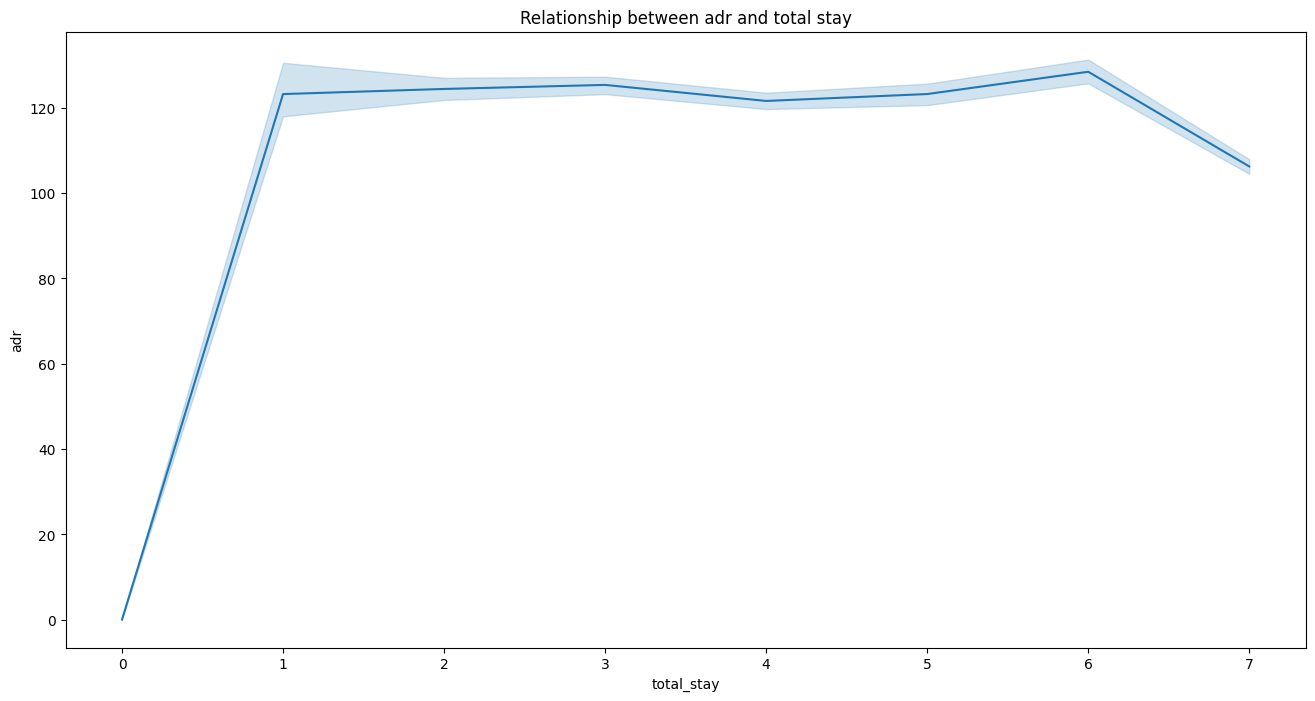

In [ ]:
#plot line chart
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')

#Correlation of the columns

<ipython-input-63-7460dfbfca71>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hb1.corr(),annot=True)


Text(0.5, 1.0, 'Co-relation of the columns')

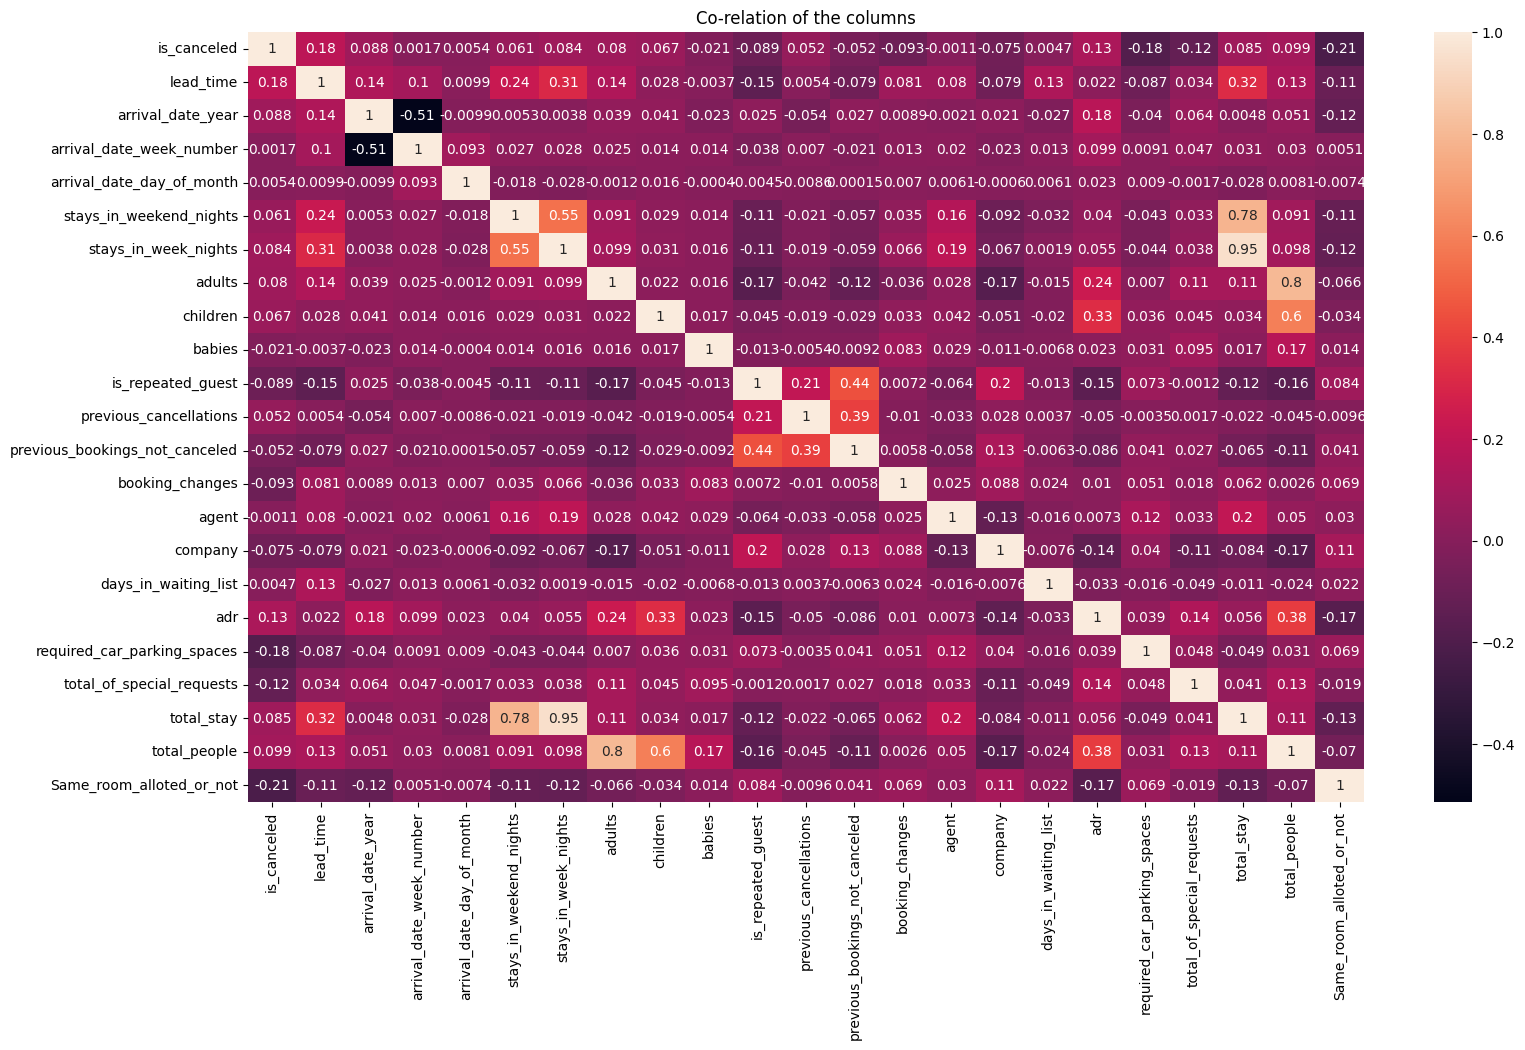

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(hb1.corr(),annot=True)
plt.title('Co-relation of the columns')

###1) is_canceled and same_room_alloted_or_not are negatively corelated. That means  customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.
###2) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
###3)adults,childrens and babies are corelated to each other. That means more the people more will be adr.
###4) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

# Relationship between the  repeated guests and previous bookings not canceled.?

In [ ]:
repeated_guests_hb=hb1[hb1['is_repeated_guest']==1]
repeated_guests_hb_1=hb1[hb1['is_repeated_guest']==0]

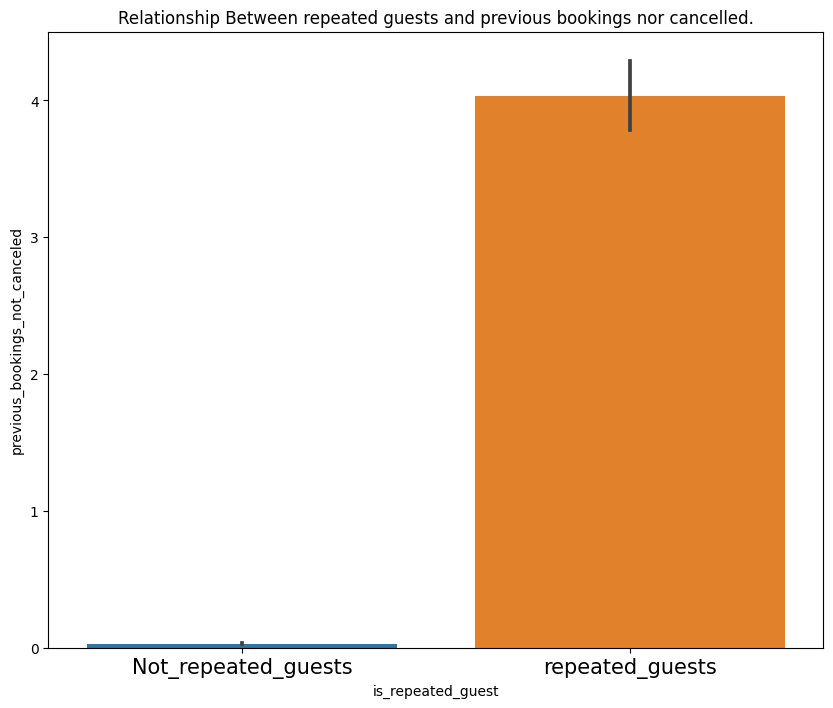

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=hb1['is_repeated_guest'],y= hb1['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

### **Observation**
###Not Repeated guests are more likely to cancel their bookings.

In [ ]:
hb1.drop(hb1[hb1['adr'] > 5000].index, inplace = True)

Text(0.5, 1.0, 'Relationship between  adr and total stay')

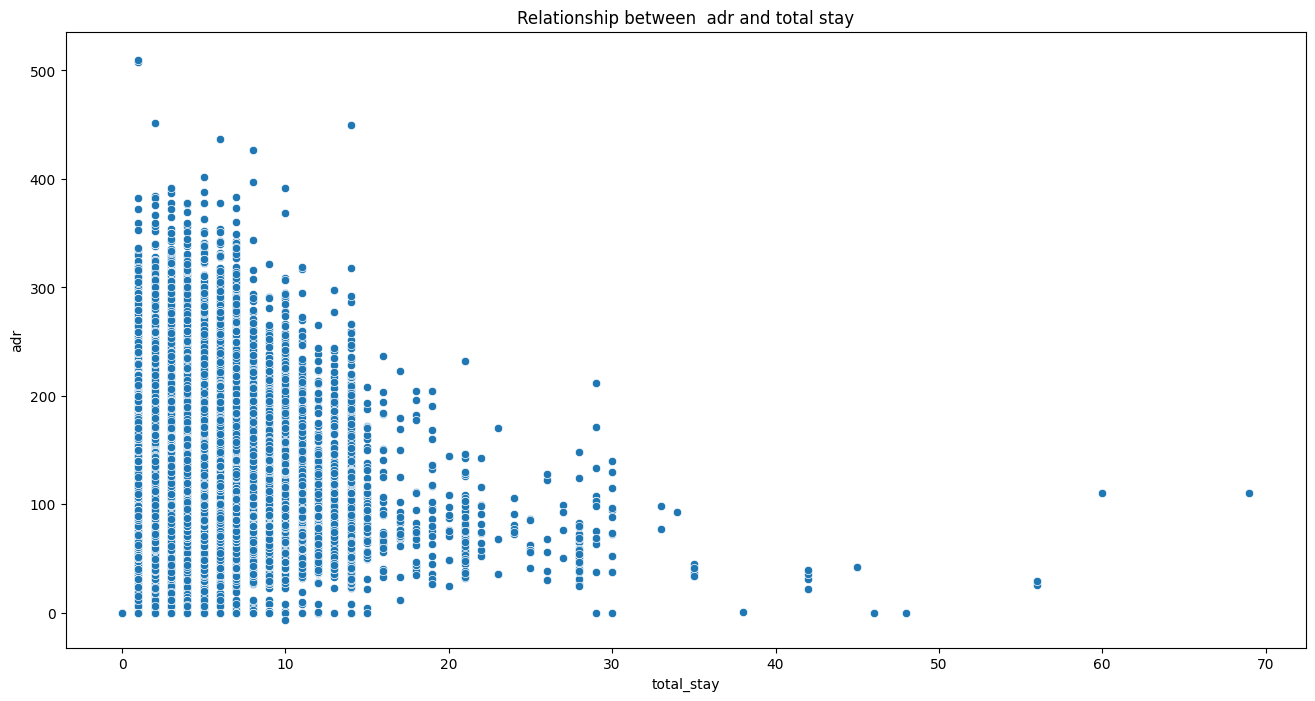

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=hb1['total_stay'],y=hb1['adr'])
plt.title('Relationship between  adr and total stay')

###From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

#ADR relationship with total number of people

Text(0.5, 1.0, 'ADR v/s Total Number of people')

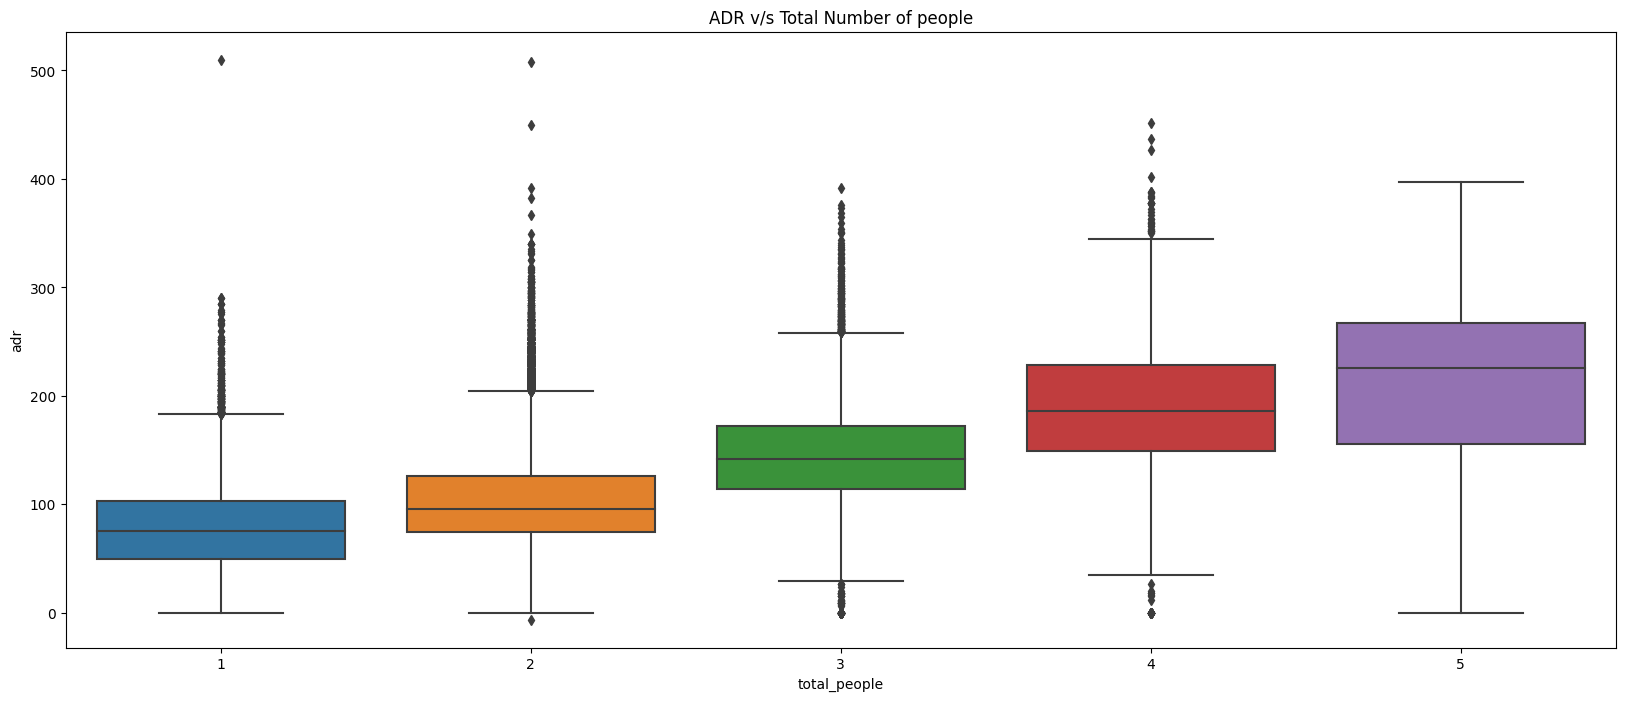

In [ ]:
plt.figure(figsize=(20,8))
df2=hb1[hb1['total_people'] < 6]

sns.boxplot(x=df2['total_people'],y=df2['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

###As the  total number of people increases adr also increases.
###Thus adr and total people are directly proportional to each other.

# **Conclusions:**

1) City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.

2) 27.5 % bookings were cancelled out of all the bookings.

3) Only 3.9% of people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.

4) The percentage of 0 changes made in the booking was more than 82 %.  Percentage of Single changes made was about 10%.

5) Most of the customers (91.6%) do not require car parking spaces.

6) 79.1 % bookings were made through TA/TO (travel agents/Tour operators).

7) BB( Bed & Breakfast) is the most preferred  type of meal by the guests. 

8) Average ADR for city hotels is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.

9) Booking cancellation rate is high for City hotels which is almost 30 %.

10) Average lead time for resort hotels is high.

11) Waiting time period for City hotels is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.

12) Resort hotels have the most repeated guests.

13) In "TA/TO", City hotels have a higher cancellation rate compared to resort hotels.

14)In "direct" both the hotels have almost the same cancellation rate.

15)Online T/A' has the highest cancellation in both type of cities

16) Almost 19 % of people did not cancel their bookings even after not getting the same room which they reserved while booking a hotel. Only 2.5 % of people cancelled their booking

17)Optimal stay in both the type hotel is less than 7 days